In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
course_activity=pd.read_csv('course_activity.csv')
feedback=pd.read_csv('feedback.csv')
students=pd.read_csv('students.csv')

In [4]:
#df.columns(students.csv)
print(students.columns)

#df.columns(course_activity.csv)
print(course_activity.columns)

#df.columns(feedback.csv)
print(feedback.columns)

Index(['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date'], dtype='object')
Index(['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage'],
      dtype='object')
Index(['Student_ID', 'Course_ID', 'Rating', 'Feedback_Text'], dtype='object')


#DATA CLEANING

In [5]:
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'])
course_activity['Date']=pd.to_datetime(course_activity['Date'], format='%d/%m/%Y')
print(students.isnull().sum())
print(course_activity.isnull().sum())
print(feedback.isnull().sum())


students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

course_activity.fillna({'Time Spent [mins]': 0, 'Completion %': 0}, inplace=True)
feedback.dropna(subset=['Rating'], inplace=True)

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


<ipython-input-5-c1f6a892b3b9>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'])


#DATA ANALYSIS

In [31]:
overall_completion = course_activity['Completion_Percentage'].mean()
print("average completion %", overall_completion)

avg_engagement = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
print("Lowest:", avg_engagement.head(1))
print("Highest:", avg_engagement.tail(1))

students['age group'] = pd.cut(students['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
merged=course_activity.merge(students, left_on ='Student_ID',right_on='Student_ID')
eng_by_age = merged.groupby('age group')['Time_Spent_Minutes'].mean()
eng_by_location = merged.groupby('Location')['Time_Spent_Minutes'].mean()

avg_feedback = feedback.groupby('Course_ID')['Rating'].mean()

combined = course_activity.merge(feedback, on=['Student_ID','Course_ID'])
correlation = combined[['Completion_Percentage','Rating']].corr().iloc[0,1]
print("Correlation between completion % and Rating:", correlation)

segment_data = combined.merge(students, left_on='Student_ID', right_on='Student_ID')
seg_summary = segment_data.groupby(['age group', 'Location']).agg({
    'Time_Spent_Minutes': 'mean',
    'Rating': 'mean'
}).sort_values(['Time_Spent_Minutes', 'Rating'], ascending=False)
top_segments = seg_summary.head(3)



average completion % 54.77871016691957
Lowest: Course_ID
PY202    93.902439
Name: Time_Spent_Minutes, dtype: float64
Highest: Course_ID
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64
Correlation between completion % and Rating: -0.05170765814948298


<ipython-input-31-31ee950c14f9>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eng_by_age = merged.groupby('age group')['Time_Spent_Minutes'].mean()
<ipython-input-31-31ee950c14f9>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_summary = segment_data.groupby(['age group', 'Location']).agg({


#Visualization

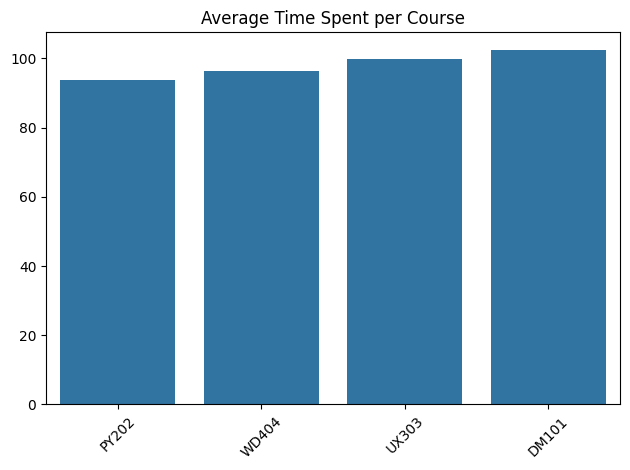

In [46]:
sns.barplot(x=avg_engagement.index.to_list(), y=avg_engagement.values)
plt.title('Average Time Spent per Course')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

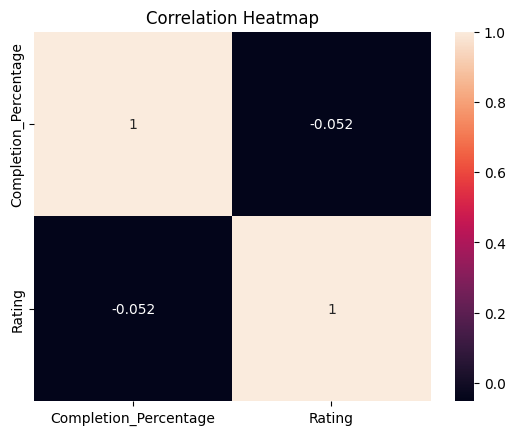

In [47]:
sns.heatmap(combined[['Completion_Percentage', 'Rating']].corr(), annot=True)
plt.title("Correlation Heatmap")


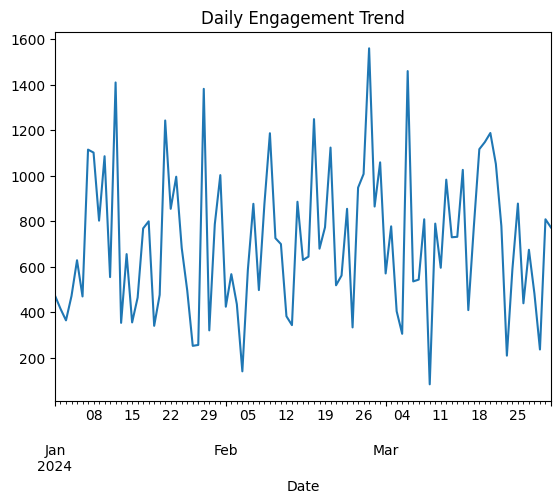

In [49]:
course_activity['Date'] = pd.to_datetime(course_activity['Date'], format='%d/%m/%Y')
time_trend = course_activity.groupby('Date')['Time_Spent_Minutes'].sum()
time_trend.plot(kind='line', title='Daily Engagement Trend')
plt.show()